In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [60]:
# Read the CSV file into a DataFrame
NYC = pd.read_csv('NYC_DATA_INPUT.csv')

# Check the shape of the dataFrame
NYC.shape

(9781, 32)

In [61]:
# Simplify feature names:
NYC = NYC.rename(columns={'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)': 'URL',
                                   'STATE OR PROVINCE': 'STATE',
                                   'ZIP OR POSTAL CODE': 'ZIP',
                                   'SQUARE FEET': 'SQFT',
                                   'PROPERTY TYPE': 'PROP_TYPE',
                                   'LOT SIZE': 'LOT',
                                   'YEAR BUILT': 'YR_BUILT',
                                   '$/SQUARE FEET': 'PRICE_SQFT',
                                   })

In [62]:
selected = ['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT', 'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

data_df = copy.deepcopy(NYC[selected])

In [63]:
data_df.head()

,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family (2-4 Unit),28 Paerdegat 9th St,Brooklyn,11236.0,999000.0,Brooklyn,0.0,1965.0,475108,40.629509,-73.905842,745.439590,3802.343826,2554.082124,1.0,0.0
1,Multi-Family (2-4 Unit),1326 E 85th St,Canarsie,11236.0,780000.0,Canarsie,0.0,1955.0,3504398,40.630677,-73.902075,560.007047,3741.402496,2343.906613,1.0,0.0
2,Multi-Family (2-4 Unit),290 Conklin Ave,Canarsie,11236.0,1300000.0,Canarsie,0.0,2006.0,3532070,40.645421,-73.899124,1289.010055,2035.028063,353.256792,5.0,2.0
3,Multi-Family (2-4 Unit),8708 Avenue N,Canarsie,11236.0,1199999.0,Canarsie,2760.0,1960.0,3531522,40.630598,-73.898676,305.695358,3885.214277,2381.676680,1.0,0.0
4,Multi-Family (2-4 Unit),1429 E 86th St,Brooklyn,11236.0,985000.0,Brooklyn,2400.0,1960.0,466364,40.629736,-73.898954,229.367213,3990.065773,2502.626837,1.0,0.0


In [64]:
# Check out null values
null_sum = data_df.isnull().sum()
null_sum

PROP_TYPE      0
ADDRESS       35
CITY          12
ZIP            0
PRICE          0
LOCATION      59
SQFT           0
YR_BUILT       0
MLS#           8
LATITUDE       0
LONGITUDE      0
PARK_DIST      0
HOSPITAL_D     0
RAIL_DIST      0
BUS_COUNTS     0
FnB_COUNTS     0
dtype: int64

In [65]:
data_df.drop(data_df[data_df['CITY'].isna()].index, inplace=True)
data_df.drop(data_df[data_df['ADDRESS'].isna()].index, inplace=True)
data_df.drop(data_df[data_df['LOCATION'].isna()].index, inplace=True)
null_sum = data_df.isnull().sum()
null_sum

PROP_TYPE     0
ADDRESS       0
CITY          0
ZIP           0
PRICE         0
LOCATION      0
SQFT          0
YR_BUILT      0
MLS#          0
LATITUDE      0
LONGITUDE     0
PARK_DIST     0
HOSPITAL_D    0
RAIL_DIST     0
BUS_COUNTS    0
FnB_COUNTS    0
dtype: int64

In [66]:
data_df.shape, data_df.columns

((9720, 16),
 Index(['PROP_TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'LOCATION', 'SQFT',
        'YR_BUILT', 'MLS#', 'LATITUDE', 'LONGITUDE', 'PARK_DIST', 'HOSPITAL_D',
        'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS'],
       dtype='object'))

In [67]:
data_df.dtypes

PROP_TYPE      object
ADDRESS        object
CITY           object
ZIP           float64
PRICE         float64
LOCATION       object
SQFT          float64
YR_BUILT      float64
MLS#           object
LATITUDE      float64
LONGITUDE     float64
PARK_DIST     float64
HOSPITAL_D    float64
RAIL_DIST     float64
BUS_COUNTS    float64
FnB_COUNTS    float64
dtype: object

In [68]:
cat_col = ['PROP_TYPE', 'CITY', 'ZIP', 'LOCATION']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,PROP_TYPE,CITY,ZIP,LOCATION
0,Multi-Family (2-4 Unit),Brooklyn,11236.0,Brooklyn
1,Multi-Family (2-4 Unit),Canarsie,11236.0,Canarsie
2,Multi-Family (2-4 Unit),Canarsie,11236.0,Canarsie
3,Multi-Family (2-4 Unit),Canarsie,11236.0,Canarsie
4,Multi-Family (2-4 Unit),Brooklyn,11236.0,Brooklyn
...,...,...,...,...
9776,Multi-Family (2-4 Unit),Brooklyn,11216.0,Brooklyn
9777,Single Family Residential,Atlantic Beach,11509.0,Atlantic Beach
9778,Multi-Family (2-4 Unit),Crown Heights,11216.0,Crown Heights
9779,Single Family Residential,Prospect Lefferts Gardens,11225.0,Prospect Lefferts Gardens


In [69]:
# the following columns now all have the categorical data types
data_df[cat_col].dtypes

PROP_TYPE    category
CITY         category
ZIP          category
LOCATION     category
dtype: object

In [70]:
# count the #samples fall into each category
data_df['CITY'].value_counts() 

Brooklyn                1839
Bronx                   1029
Staten Island            907
Flushing                 865
New York                 394
                        ... 
Outside Of Usa             1
Queens Village North       1
Richmond                   1
Richmond Hill N.           1
Jamacia                    1
Name: CITY, Length: 157, dtype: int64

In [71]:
# double check the remaining categories 
data_df['CITY'].astype('string').value_counts()

Brooklyn         1839
Bronx            1029
Staten Island     907
Flushing          865
New York          394
                 ... 
Fort Hamilton       1
Thompsonville       1
Accord              1
Richmond            1
Baxter              1
Name: CITY, Length: 157, dtype: Int64

In [72]:
# check the data of PROPERTY TYPE
data_df['PROP_TYPE'].value_counts() 

Condo/Co-op                  4175
Multi-Family (2-4 Unit)      2423
Single Family Residential    2247
Townhouse                     324
Vacant Land                   307
Multi-Family (5+ Unit)        242
Unknown                         2
Name: PROP_TYPE, dtype: int64

In [73]:
# Merge two seperate multi-family categories into one single category
data_df['PROP_TYPE'].replace(['Multi-Family (5+ Unit)', 'Multi-Family (2-4 Unit)'],'Multi-Family', inplace=True)

In [74]:
data_df['PROP_TYPE'].value_counts() 

Condo/Co-op                  4175
Multi-Family                 2665
Single Family Residential    2247
Townhouse                     324
Vacant Land                   307
Unknown                         2
Name: PROP_TYPE, dtype: int64

In [75]:
data_df.dtypes

PROP_TYPE     category
ADDRESS         object
CITY          category
ZIP           category
PRICE          float64
LOCATION      category
SQFT           float64
YR_BUILT       float64
MLS#            object
LATITUDE       float64
LONGITUDE      float64
PARK_DIST      float64
HOSPITAL_D     float64
RAIL_DIST      float64
BUS_COUNTS     float64
FnB_COUNTS     float64
dtype: object

In [76]:
average_sqft = data_df[data_df['SQFT'] != 0]['SQFT'].mean()

data_df.loc[data_df['SQFT'] == 0, 'SQFT'] = average_sqft

average_yr = data_df[data_df['YR_BUILT'] != 0]['YR_BUILT'].mean()

data_df.loc[data_df['YR_BUILT'] == 0, 'YR_BUILT'] = average_yr

In [77]:
num_col = ['PRICE', 'SQFT', 'YR_BUILT', 'PARK_DIST', 'HOSPITAL_D', 'RAIL_DIST', 'BUS_COUNTS', 'FnB_COUNTS']

In [78]:
data_df[num_col].describe()

,PRICE,SQFT,YR_BUILT,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
count,9.720000e+03,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000
mean,1.011520e+06,1829.844584,1956.764594,1053.029879,2820.303388,1823.253970,9.328704,34.691770
std,1.055145e+06,1558.986152,39.175539,750.587643,1971.445251,2139.689910,6.985667,62.239274
min,1.500000e+03,2.000000,1050.000000,0.000000,77.246754,14.407025,0.000000,0.000000
25%,4.548750e+05,1053.750000,1930.000000,468.563052,1350.294111,493.252320,4.000000,4.000000
50%,7.500000e+05,1829.844584,1955.000000,933.287774,2261.296101,924.071100,8.000000,13.000000
75%,1.200000e+06,1829.844584,1975.000000,1481.732642,3856.765082,2145.094597,13.000000,41.000000
max,1.900000e+07,36930.000000,2957.000000,4955.299870,11862.670453,10910.125986,44.000000,661.000000


<Axes: xlabel='YR_BUILT'>

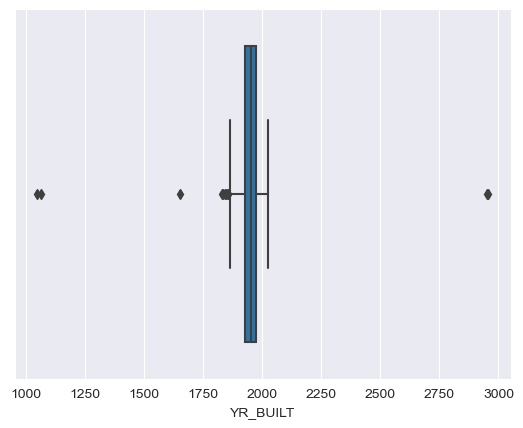

In [79]:
# draw box plot to check outliers
attr = 'YR_BUILT'
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=data_df[attr], orient='h')

In [80]:
Q1 = data_df[attr].quantile(0.25)
Q3 = data_df[attr].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
print(Q1, Q3, lower_thresh, upper_thresh)

1930.0 1975.0 1862.5 2042.5


In [81]:
import copy
data_check = copy.deepcopy(data_df)

data_check



,PROP_TYPE,ADDRESS,CITY,ZIP,PRICE,LOCATION,SQFT,YR_BUILT,MLS#,LATITUDE,LONGITUDE,PARK_DIST,HOSPITAL_D,RAIL_DIST,BUS_COUNTS,FnB_COUNTS
0,Multi-Family,28 Paerdegat 9th St,Brooklyn,11236.0,999000.0,Brooklyn,1829.844584,1965.0,475108,40.629509,-73.905842,745.439590,3802.343826,2554.082124,1.0,0.0
1,Multi-Family,1326 E 85th St,Canarsie,11236.0,780000.0,Canarsie,1829.844584,1955.0,3504398,40.630677,-73.902075,560.007047,3741.402496,2343.906613,1.0,0.0
2,Multi-Family,290 Conklin Ave,Canarsie,11236.0,1300000.0,Canarsie,1829.844584,2006.0,3532070,40.645421,-73.899124,1289.010055,2035.028063,353.256792,5.0,2.0
3,Multi-Family,8708 Avenue N,Canarsie,11236.0,1199999.0,Canarsie,2760.000000,1960.0,3531522,40.630598,-73.898676,305.695358,3885.214277,2381.676680,1.0,0.0
4,Multi-Family,1429 E 86th St,Brooklyn,11236.0,985000.0,Brooklyn,2400.000000,1960.0,466364,40.629736,-73.898954,229.367213,3990.065773,2502.626837,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,Multi-Family,1352 Pacific St,Brooklyn,11216.0,2996000.0,Brooklyn,2880.000000,1899.0,478640,40.677247,-73.945652,439.236913,938.678113,662.492556,25.0,113.0
9777,Single Family Residential,188 Coronado St,Atlantic Beach,11509.0,2339000.0,Atlantic Beach,1829.844584,2024.0,3530489,40.592191,-73.739029,619.744270,1858.998865,2513.577115,2.0,0.0
9778,Multi-Family,272 New York Ave,Crown Heights,11216.0,2599000.0,Crown Heights,2869.000000,1910.0,H6278608,40.671011,-73.947885,163.559128,1599.218343,334.238574,23.0,57.0
9779,Single Family Residential,202 Maple St,Prospect Lefferts Gardens,11225.0,2149000.0,Prospect Lefferts Gardens,1829.844584,1905.0,3516618,40.660437,-73.954169,964.153646,1170.249467,500.869649,19.0,79.0


In [82]:
for attr in num_col:
    Q1 = data_check[attr].quantile(0.25)
    Q3 = data_check[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_thresh = Q1 - 1.5 * IQR
    upper_thresh = Q3 + 1.5 * IQR
    print(attr, Q1, Q3, lower_thresh, upper_thresh)

    # Use | for logical OR and additional parentheses for proper order of operations
    data_check.drop(data_check[(data_check[attr] > upper_thresh) | (data_check[attr] < lower_thresh)].index, inplace=True)

# Print the length of the filtered DataFrame
print(len(data_check))


PRICE 454875.0 1200000.0 -662812.5 2317687.5
SQFT 1000.0 1829.8445839874412 -244.76687598116177 3074.611459968603
YR_BUILT 1930.0 1974.0 1864.0 2040.0
PARK_DIST 475.64524273161504 1501.61535848055 -1063.3099308917872 3040.5705321039522
HOSPITAL_D 1335.74201424787 3917.9302574730896 -2537.5403505899594 7791.212622310919
RAIL_DIST 505.948737079813 2112.03320262373 -1903.1779612360629 4521.159900939606
BUS_COUNTS 5.0 14.0 -8.5 27.5
FnB_COUNTS 5.0 43.0 -52.0 100.0
6664


In [83]:

# Export df to csv:

data_check.to_csv('NYC_DATA_OUTPUT.csv')